# Step 1: Import Required Libraries

In [1]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Step 2: Load Dataset

In [2]:
# Step 2: Load Inbuilt Dataset (20 Newsgroups)
categories = ['rec.autos', 'sci.med']  # Simulate spam vs ham
data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

df = pd.DataFrame({'message': data.data, 'label': data.target})  # 0 = rec.autos, 1 = sci.med


# Step 3: Preprocess Text Data

In [5]:
# Step 3: Preprocess Text Data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

df['processed_message'] = df['message'].apply(preprocess_text)


# Step 4: Convert Text to Features Using TF-IDF
# Step 5: Split Data for Training & Testing
# Step 6: Train the Naïve Bayes Classifier

In [6]:
# Step 4: Convert Text to TF-IDF Features
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['processed_message']).toarray()
y = df['label']

# Step 5: Split Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Step 7: Evaluate Model Performance

In [7]:
# Step 7: Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9242

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       200
           1       0.91      0.94      0.92       196

    accuracy                           0.92       396
   macro avg       0.92      0.92      0.92       396
weighted avg       0.92      0.92      0.92       396



# Step 8: Visualize Results (Confusion Matrix)

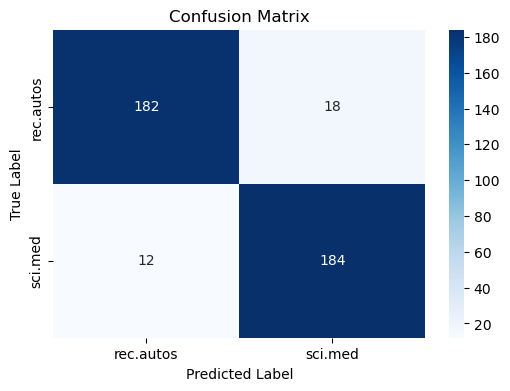

In [8]:

# Step 8: Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
